In [51]:
import glob as glob
import tifffile as tiff
import torch
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
tiff_files = glob.glob('/root/data/train/kidney_2/labels/*.tif')

In [3]:
tensor_list = []

for filename in tiff_files:
    array = tiff.imread(filename)
    tensor = torch.from_numpy(array.astype(np.float32))
    tensor_list.append(tensor)

In [4]:
stacked_tensor = torch.stack(tensor_list, dim=0) 

In [ ]:
stacked_tensor

In [50]:
tensor_list[1400].min(), tensor_list[1400].max()

(tensor(0.), tensor(255.))

In [6]:
stacked_tensor = stacked_tensor.unsqueeze(0)

In [7]:
k_size = 3

kernel = torch.ones(1,1,k_size,k_size,k_size)

ysum = F.conv3d(stacked_tensor.float(), kernel, padding=k_size//2)

In [8]:
ysum.shape

torch.Size([1, 2217, 1041, 1511])

In [9]:
ysum_dice = ysum.squeeze().numpy()

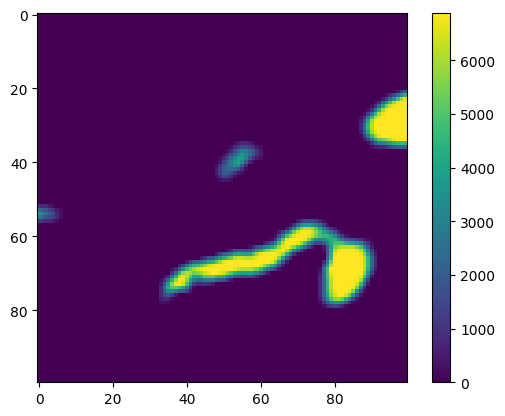

In [20]:
plt.imshow(ysum_dice[1132,520:620,200:300])
plt.colorbar()

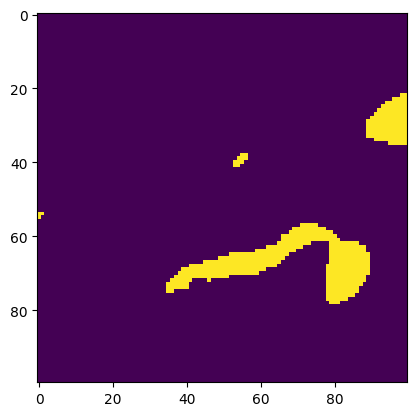

In [18]:
plt.imshow(stacked[1132,520:620,200:300])

In [21]:
yremove = ysum < 6880
y_vol = ysum > 6880
#y_outline = stacked_tensor[0,0].float() * yremove[0,0].float()
y_outline_full = stacked_tensor.float() * yremove


In [29]:
y_outline_full = y_outline_full.squeeze().numpy()

In [32]:
#y_outline_full = y_outline_full.squeeze()
y_outline_full = y_outline_full > 50

True

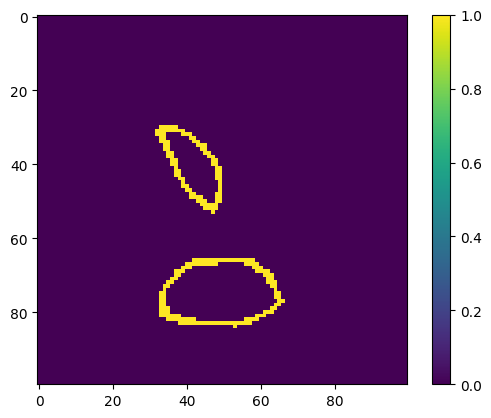

In [33]:
plt.imshow(y_outline_full[1000,400:500,500:600])
plt.colorbar()
y_outline_full.max()

In [93]:
#pred = pred.sigmoid()
#pred = pred.view(-1)
#true = true.view(-1)
surface_pred = y_outline_full[1000,400:500,450:550]
surface_true = y_outline_full[1000,400:500,450:550]
volume_pred = y_vol[1000,400:500,450:550]
volume_true = y_vol[1000,400:500,450:550]

smooth = 1
surface_intersection = (surface_pred * surface_true).sum()
volume_intersection = (volume_pred * volume_true).sum()

surface_dice = (2. * (surface_intersection + (0.5*volume_intersection)) + smooth) / (surface_pred.sum() + surface_true.sum() + (0.5*volume_pred.sum()) + (0.5*volume_true.sum()) + smooth)

#1 - surface_dice

In [97]:
surface_dice_test = (2. * (0.5*surface_intersection + (volume_intersection)) + smooth) / ((0.5*surface_pred.sum()) + (0.5*surface_true.sum()) + (volume_pred.sum()) + (volume_true.sum()) + smooth)


In [98]:
surface_dice_test

tensor(1.)

In [36]:
y_vol = y_vol.squeeze().numpy()

In [37]:
y_vol.shape

(2217, 1041, 1511)

(True, False)

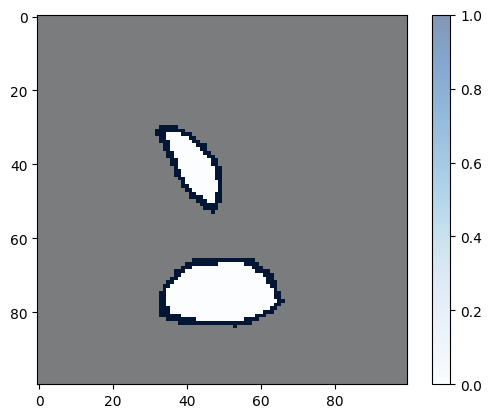

In [45]:
plt.imshow(y_vol[1000,400:500,500:600], cmap='gray')
plt.imshow(y_outline_full[1000,400:500,500:600], cmap='Blues', alpha=0.5)
plt.colorbar()
y_outline_full.max(), y_outline_full.min()

In [34]:
y_outline_full # DONE
y_vol # DONE


(2217, 1041, 1511)

In [61]:
y_vol = y_vol.astype(np.uint8)

In [54]:
y_outline_full = y_outline_full.astype(np.uint8)

In [56]:
y_outline_full[1400,:,:].max(), y_outline_full[1400,:,:].min()

(1, 0)

In [68]:
for i in range(y_outline_full.shape[0]):
    slice = y_outline_full[i,:,:]
    slice = cv2.normalize(slice, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    filename = os.path.join('/root/sennet-kaggle/src/util/2d_nn/surfaces', f'{i:04d}.jpg')
    cv2.imwrite(filename, slice)

In [63]:
y_vol.shape

(2217, 1041, 1511)

In [69]:
for i in range(y_vol.shape[0]):
    slice_vol = y_vol[i,:,:]
    slice_vol = cv2.normalize(slice_vol, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    filename = os.path.join('/root/sennet-kaggle/src/util/2d_nn/volumes', f'{i:04d}.jpg')
    cv2.imwrite(filename, slice_vol)

In [67]:
y_vol[1400,:,:].max(), y_vol[1400,:,:].min()    

(1, 0)

In [70]:
test_surface = cv2.imread('/root/sennet-kaggle/src/util/2d_nn/surfaces/1400.jpg', cv2.IMREAD_GRAYSCALE)

In [72]:
test_volume = cv2.imread('/root/sennet-kaggle/src/util/2d_nn/volumes/1400.jpg', cv2.IMREAD_GRAYSCALE)

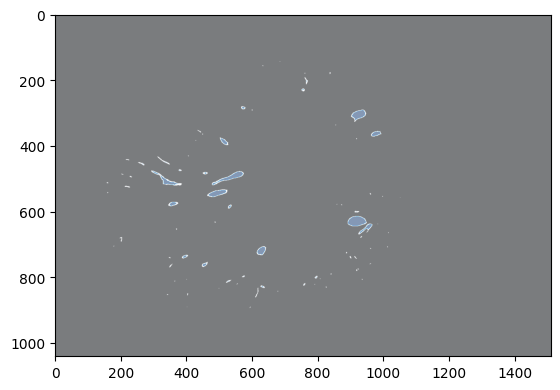

In [78]:
#plt.imshow(test_surface, cmap='gray')   
plt.imshow(tensor_list[1400], cmap='gray')
plt.imshow(test_volume, cmap='Blues', alpha=0.5)
